In [1]:
# %%
import sys
import os
# parentpath=os.getcwd().split("Subsea_Field_Layout_Opt") [0] + "Subsea_Field_Layout_Opt"
parentpath=os.getcwd().split("Demos") [0]
sys.path.append(parentpath)

from CLS_OptField import OptField

# # .ipynb acutally does not need this
from multiprocessing import freeze_support
if __name__ == '__main__':
    freeze_support()

In [2]:
# %%
filepath=parentpath+"\\Demos\\ex3\\input_ex3.json"
print("//////////////////////////////")
print("executing on the following file:")
print(filepath)
print("//////////////////////////////")

//////////////////////////////
executing on the following file:
d:\OneDrive\OneDrive - LHG\Projects\OptLayout_GUI\\Demos\ex3\input_ex3.json
//////////////////////////////


In [3]:
# %%
# initialize a class instance
myfield=OptField(filepath)

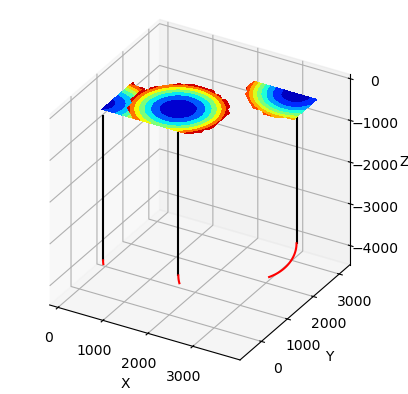

In [4]:
# %%
# compute all cost contours as satellites
myfield.get_contours()

# simple visualization of the contours
myfield.plot_contours()

[  0.94314627 184.90293874] [1880.52798109 1115.09706126]
[  0.94314627 184.90293874] [1880.52798109 1115.09706126]
[  0.93944399 184.90293874] [1895.52798109 1115.09706126]
[  0.93721513 169.90293874] [1895.52798109 1130.09706126]
[  0.93627407 187.99076915] [1910.20671752 1112.00923085]
[  0.93785999 186.44685395] [1902.86734931 1113.55314605]
[  0.93815424 190.07034144] [1903.83318488 1109.92965856]
[  0.93703037 182.91162032] [1904.11819829 1117.08837968]
[  0.93735337 180.4198645 ] [1901.31576133 1119.5801355 ]
[  0.93657887 176.79684852] [1902.28336416 1123.20315148]
[  0.93786843 180.8682955 ] [1899.49517499 1119.1317045 ]
[  0.93716912 179.50343173] [1901.51339036 1120.49656827]
[  0.93716463 180.655789  ] [1902.22309031 1119.344211  ]
[  0.93747199 180.82279581] [1901.07623488 1119.17720419]
[  0.93730552 180.47567496] [1901.54339444 1119.52432504]
[  0.93724181 180.29637873] [1901.6943398  1119.70362127]
[  0.93717569 180.21633585] [1901.91462321 1119.78366415]
[  0.93715095 

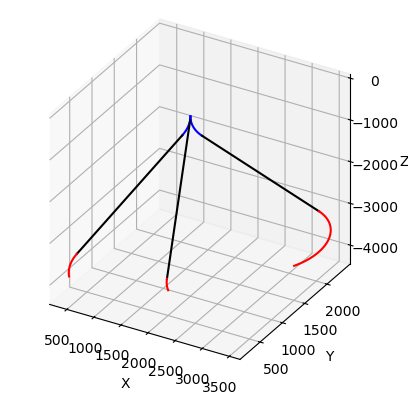

In [5]:
# %%
# check one cluster, i.e., 1-site-N-wells
myfield.get_1site()
myfield.plot_1site()

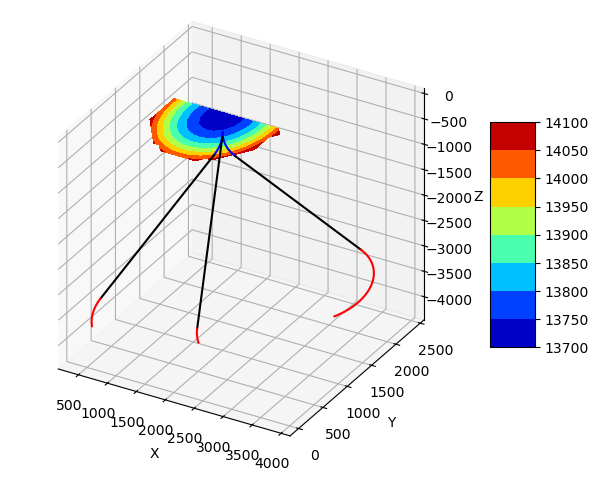

In [6]:
# show the cost contour of the 1-site-N-wells problem
myfield.plot_1site(showContour=1)

From the cost contour for the 1-site-N-wells problem, we can clearly see the contour is clipped because:  
there is a constraint for the first well ' -PK[1]+1300' which means the Y-component of the KOP location should be no larger than 1300m. As all wells are driled from the same sites, such a constraint for a single well is actually a location constraint for the drill site.

In [7]:
# check current constraints
myfield.necon

[['-theta2+pi/2', ' -PK[1]+1300'], ['nan'], ['nan']]

You can easily identify that the 2nd turn of the first well is smaller than 90 degrees (pi/2), while the second well's exceeds 90 degrees.

In [8]:
# check the 2nd turn angle(rad) of those trajectories
[myfield.soluList_1site[i]['theta2'] for i in range(3)]

[0.6336223229734855, 1.8091275917342813, 0.31989073455394285]

[184.90293874  -0.24424206] [1880.52798109 1115.09706126]
[184.90293874  -0.24424206] [1880.52798109 1115.09706126]
[184.90293874  -0.24060035] [1895.52798109 1115.09706126]
[169.90293874  -0.23831865] [1895.52798109 1130.09706126]
[176.93882887  -0.23629228] [1908.23911613 1123.06117113]
[172.96657583  -0.23413233] [1914.60081447 1127.03342417]
[170.97561002  -0.23305088] [1917.77863686 1129.02438998]
[168.97970895  -0.23196846] [1920.95336188 1131.02029105]
[166.97971362  -0.23088506] [1924.12550921 1133.02028638]
[164.97482187  -0.22980069] [1927.29456412 1135.02517813]
[162.96426412  -0.22871537] [1930.46002737 1137.03573588]
[160.94730394  -0.22762909] [1933.62141497 1139.05269606]
[158.92324466  -0.22654186] [1936.77826214 1141.07675534]
[156.89143593  -0.2254537 ] [1939.93012719 1143.10856407]
[154.8512794   -0.22436462] [1943.07659526 1145.1487206 ]
[152.8022335   -0.22327462] [1946.21728164 1147.1977665 ]
[150.74381677  -0.22218373] [1949.35183432 1149.25618323]
[148.67560969 

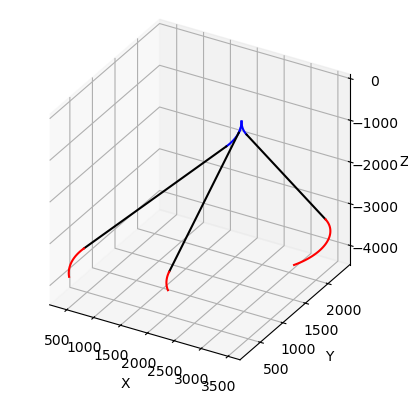

In [9]:
# replicate a case, and change "necon"
myfield2=OptField(filepath)
myfield2.necon=[ [' -PK[1]+1300'], ['-theta2+pi/2'], ['nan']]
myfield2.get_1site()
myfield2.plot_1site()

In [10]:
# check the specific trajectory in the solution
myfield2.soluList_1site[1]

{'r': 859.4366926962349,
 'P1': array([2704.48698389, 1300.        , -300.        ]),
 'P2': array([ 3011.47,  2098.01, -4368.09]),
 'V1': array([ 0.,  0., -1.]),
 'V2': array([-16.42, -10.47,  -8.11]),
 'v1': array([ 0.,  0., -1.]),
 'v2': array([-0.77837443, -0.49632036, -0.38444681]),
 'T': array([  714.71566854,   896.78727284, -2604.80814107]),
 'Ls': 2846.062429282104,
 't': array([ 0.25112438,  0.31509754, -0.91523226]),
 'PO1': array([714.71566854, 896.78727284,   0.        ]),
 'po1': array([0.6232508 , 0.78202202, 0.        ]),
 'O1': array([3240.1315936 , 1972.09841604, -300.        ]),
 'CO1': array([1861697.19197471, 2335958.78909088, 1315045.89958247]),
 'co1': array([0.57041924, 0.71573178, 0.40292669]),
 'C1': array([2749.89236844, 1356.97226572, -646.28997972]),
 'PO2': array([-318055.19082944, -399078.76621221, 1159164.10797303]),
 'po2': array([-0.25112438, -0.31509754,  0.91523226]),
 'O2': array([ 2795.64449172,  1827.20361154, -3581.50581589]),
 'CO2': array([-467

In [11]:
# save 1-site-N-wells results to json file
myfield.write_json_1site("ex3_traj_.json")

=====file ex3_traj_1.json written successfully=====
=====file ex3_traj_2.json written successfully=====
=====file ex3_traj_3.json written successfully=====


In [12]:
# save 1-site-N-wells results to excel file
myfield.write_excel_1site("ex3_output.xls")

=====sheet: WellTraj_No_1 written successfully=====
=====sheet: WellTraj_No_2 written successfully=====
=====sheet: WellTraj_No_3 written successfully=====


In [13]:
# save cost contours of satellites to json file
myfield.write_json_contours("ex3_cstcontour_.json")

=====file ex3_cstcontour_1.json written successfully=====
=====file ex3_cstcontour_2.json written successfully=====
=====file ex3_cstcontour_3.json written successfully=====


In [14]:
# save cost contours of satellites to excel file
myfield.write_excel_contours("ex3_output.xls")

=====sheet: CostContour_NO_1 written successfully=====
=====sheet: CostContour_NO_2 written successfully=====
=====sheet: CostContour_NO_3 written successfully=====


In [15]:
# save cost contours of 1-site-N-well to json file
# Use ClusterNO to identify different clusters
myfield.write_json_contour1site("ex3_cstcontour_cluster_.json",
                                ClusterNO=1)

=====file ex3_cstcontour_cluster_1.json written successfully=====


In [16]:
# save cost contours of 1-site-N-well to json file
# Use ClusterNO to identify different clusters
myfield.write_excel_contour1site("ex3_output.xls",
                                ClusterNO=1)

=====CostContour_NO_1 written successfully=====
